In [1]:
# Import librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Chargements données

# Anciennce base
dfa = pd.read_csv("C:/Users/lohof/Desktop/data4good/shift_data_portal/shiftdataportal_github/server/data/FOSSIL_RESERVES_bp_fossil_with_zones_prod.csv")
dfa = dfa[dfa["energy_source"] == "Oil"]

# Nouvelle base
dfb = pd.read_excel("C:/Users/lohof/Desktop/data4good/shift_data_portal/fossil_reserves/data4good_sdp_fossil_reserves/opec_full_data/T31.xlsx",
                    header = 2)
dfb = dfb.iloc[:59, :]
dfb = dfb.rename(columns={'Unnamed: 0': 'group_name'})

In [3]:
# Harmonisation unités de mesure des réserves (mb -> gb)
dfb.iloc[:,1:] = dfb.iloc[:,1:].apply(lambda x: round(pd.to_numeric(x, errors='coerce') / 1000, 3))

In [4]:
# Uniformisation noms pays
translations_dictionnary = {"ALM": "ALM SRES",
                        "ALM SRES": "ALM SRES",
                        "ASIA": "ASIA SRES",
                        "ASIA SRES": "ASIA SRES",
                        "Afghanistan": "Afghanistan",
                        "Albania": "Albania",
                        "Albanie": "Albania",
                        "Algérie": "Algeria",
                        "Algeria": "Algeria",
                        "American Samoa": "American Samoa",
                        "Andorra": "Andorra",
                        "Angola": "Angola",
                        "Antigua and Barbuda": "Antigua and Barbuda",
                        "Antigua": "Antigua and Barbuda",
                        "Antigua & Barbuda": "Antigua and Barbuda",
                        "Argentina": "Argentina",
                        "Argentine": "Argentina",
                        "Armenia": "Armenia",
                        "Arménie": "Armenia",
                        "Aruba": "Aruba",
                        "Australia": "Australia",
                        "Australie": "Australia",
                        "Austrial": "Austria",
                        "Austria": "Austria",
                        "Autriche": "Austria",
                        "Azerbaijan": "Azerbaijan",
                        "Azerbaïdjan": "Azerbaijan",
                        "Bahamas": "Bahamas",
                        "Bahamas, The": "Bahamas",
                        "Bahrein": "Bahrain",
                        "Bahrain": "Bahrain",
                        "Bangladesh": "Bangladesh",
                        "Barbados": "Barbados",
                        "Bélarus": "Belarus",
                        "Belarus": "Belarus",
                        "Belize": "Belize",
                        "Belgium & Luxembourg": "Belgium",
                        "Belgique": "Belgium",
                        "Belgium": "Belgium",
                        "Belgium-Luxembourg": "Belgium",
                        "Bermuda": "Bermuda",
                        "Benin": "Benin",
                        "Bénin": "Benin",
                        "Bhoutan": "Bhutan",
                        "Bhutan": "Bhutan",
                        "Bolivia, Plurinational State of": "Bolivia",
                        "Bolivia": "Bolivia",
                        "Bolivie": "Bolivia",
                        "Bolivia (Plurinational State of)": "Bolivia",
                        "Botswana": "Botswana",
                        "Bosnia ": "Bosnia and Herzegovina",
                        "Bosnie-Herzégovine": "Bosnia and Herzegovina",
                        "Bosnia and Herzegovina": "Bosnia and Herzegovina",
                        "Bosnia & Herzegovina": "Bosnia and Herzegovina",
                        "Bresil": "Brazil",
                        "Brezil": "Brazil",
                        "Brasil": "Brazil",
                        "Brazil": "Brazil",
                        "Brésil": "Brazil",
                        "Virgin Islands, British": "British Virgin Islands",
                        "British Virgin Islands": "British Virgin Islands",
                        "Brunei Darussalam": "Brunei Darussalam",
                        "Brunei*": "Brunei Darussalam",
                        "Brunei": "Brunei Darussalam",
                        "Bulgaria": "Bulgaria",
                        "Bulgarie": "Bulgaria",
                        "Burkina Faso": "Burkina Faso",
                        "Burma (Myanmar)": "Burma",
                        "Burma": "Burma",
                        "Birmania": "Burma",
                        "Birmanie": "Burma",
                        "Myanmar": "Burma",
                        "Burundi": "Burundi",
                        "Cambodia": "Cambodia",
                        "Cambodge": "Cambodia",
                        "Kampuchea Dem.": "Cambodia",
                        "Cameroon": "Cameroon",
                        "Cameroun": "Cameroon",
                        "Canada": "Canada",
                        "Canada1":"Canada",
                        "Cabo Verde": "Cape Verde",
                        "Cape Verde": "Cape Verde",
                        "Central African Republic": "Central African Republic",
                        "Chad": "Chad",
                        "Cayman Islands": "Cayman Islands",
                        "Chile": "Chile",
                        "Chili": "Chile", "Rép. populaire de Chine": "China", "Chine": "China", "China": "China",
                        "People's Republic of China": "China", "China, mainland": "China, mainland",
                        "Colombie": "Colombia", "Colombia": "Colombia", "Comoros": "Comoros",
                        "Republic of Congo": "Congo",
                        "Republic of Congo (Brazzaville)": "Congo",
                        "Congo Republic of the": "Congo",
                        "Congo 'Brazzaville'": "Congo",
                        "Congo-Brazzaville" : "Congo",
                        "Congo": "Congo",
                        "Congo, Rep.": "Congo",
                        "Congo (Brazzaville)": "Congo",
                        "Cook Islands": "Cook Islands",
                        "Costa Rica": "Costa Rica", "Croatia": "Croatia", "Croatie": "Croatia", "Cuba": "Cuba",
                        "Cyprus": "Cyprus", "Chypre": "Cyprus", "Czech Republic": "Czechia", "Czechia": "Czechia",
                        "République tchèque": "Czechia",
                        "Tchecoslovaquie": "Czechoslovakia",
                        "Former Czechoslovakia": "Czechoslovakia",
                        "Tchécoslovaquie": "Czechoslovakia",
                        "Czechoslovakia": "Czechoslovakia",
                        "Europe": "Delete", "Middle East": "Delete",
                        "Delete": "Delete", "Central & South America": "Delete", "Antarctica": "Delete",
                        "Eurasia": "Delete", "Hawaiian Trade Zone": "Delete", "Asia & Oceania": "Delete",
                        "North America": "Delete", "Africa": "Delete",
                        "Congo, Democratic Republic of the": "Democratic Republic of the Congo",
                        "Congo Democratic Republic of the": "Democratic Republic of the Congo",
                        "DR Congo": "Democratic Republic of the Congo",
                        "Congo_the Democratic Republic of the": "Democratic Republic of the Congo",
                        "Congo, République démocratique": "Democratic Republic of the Congo",
                        "Zaire": "Democratic Republic of the Congo",
                        "Democratic Republic of the Congo": "Democratic Republic of the Congo",
                        "Congo, Dem. Rep.": "Democratic Republic of the Congo",
                        "Congo (Kinshasa)": "Democratic Republic of the Congo",
                        "Congo-Kinshasa":"Democratic Republic of the Congo",
                        "D.R. of the Congo": "Democratic Republic of the Congo",  # TODO - fusionner les pays Congo avec Democratic Republic of the Congo ?
                        "Congo, Dem. Republic": "Democratic Republic of the Congo",
                        "Denmark": "Denmark",
                        "Danemark": "Denmark", "Djibouti": "Djibouti", "Dominica": "Dominica", "Dominique": "Dominica",
                        "Rep. Dominicaine": "Dominican Republic", "Dominican Republic": "Dominican Republic",
                        "République dominicaine": "Dominican Republic", "Ecuador": "Ecuador", "Equateur": "Ecuador",
                        "Egypte": "Egypt", "Egypt": "Egypt", "Egypt, Arab Rep.": "Egypt", "Salvador": "El Salvador",
                        "El Salvador": "El Salvador", "Eritrea": "Eritrea", "Erythrée": "Eritrea", "Estonie": "Estonia",
                        "Estonia": "Estonia",
                        "European Union (28)": "EU28",  # TODO - fixer la traduction de European Union (28) dans des fichiers comme cait.py ?
                        "Eswatini": "Eswatini",
                        "Swaziland": "Eswatini",  # TODO - vérifier quel nom utiliser entre Swaziland et Eswatini
                        "Ethiopia PDR": "Ethiopia",
                        "Ethiopia": "Ethiopia", "Ethiopie": "Ethiopia", "Faeroe Islands": "Faeroe Islands",
                        "Faroe Islands": "Faeroe Islands", "Iles Feroe": "Faeroe Islands",
                        "Falkland Islands (Malvinas)": "Falkland Islands (Malvinas)",
                        "Falkland Islands" : "Falkland Islands (Malvinas)",
                        "Malouines": "Falkland Islands (Malvinas)",
                        "Falkland Islands (Islas Malvinas)": "Falkland Islands (Malvinas)", "Fiji": "Fiji",
                        "Finland": "Finland", "Finlande": "Finland", "France": "France",
                        "French Guiana": "French Guiana",
                        "Polynesie Franc.": "French Polynesia", "French Polynesia": "French Polynesia",
                        "Gabon": "Gabon", "Gambia": "Gambia", "Gambia, The": "Gambia", "Ghana": "Ghana",
                        "Géorgie": "Georgia", "Georgia": "Georgia", "Germany (Offshore)": "Germany",
                        "Allemagne": "Germany", "Germany, West": "Germany", "RFA": "Germany", "Germany": "Germany",
                        "RDA": "Germany",
                        "Germany, East": "Germany",
                        "Gibraltar": "Gibraltar",
                        "Greece": "Greece",
                        "Grèce": "Greece",
                        "Grece": "Greece", "Greenland": "Greenland", "Groenland": "Greenland", "Grenada": "Grenada",
                        "Guam": "Guam",
                        "Guatemala": "Guatemala",
                        "Equatorial Guinea": "Equatorial Guinea",
                        "Guadeloupe": "Guadeloupe",
                        "Guinea": "Guinea", "Guinea-Bissau": "Guinea-Bissau", "Guinea Bissau ": "Guinea-Bissau",
                        "Guyana": "Guyana",
                        "Guyane": "Guyana", "Haïti": "Haiti", "Haiti": "Haiti",
                        "Honduras": "Honduras",
                        "Hong Kong, Special Administrative Region of China": "Hong Kong Special Administrative Region (China)",
                        "Hong Kong": "Hong Kong Special Administrative Region (China)",
                        "China, Hong Kong SAR": "Hong Kong Special Administrative Region (China)",
                        "China Hong Kong SAR": "Hong Kong Special Administrative Region (China)",
                        "Hong-Kong, China": "Hong Kong Special Administrative Region (China)",
                        "Hong-Kong, Chine": "Hong Kong Special Administrative Region (China)",
                        "Hong Kong Special Administrative Region (China)": "Hong Kong Special Administrative Region (China)",
                        "Hong Kong SAR, China": "Hong Kong Special Administrative Region (China)",
                        "Hong Kong, China": "Hong Kong Special Administrative Region (China)",
                        "Hungary": "Hungary", "Hongrie": "Hungary", "Iceland": "Iceland", "Islande": "Iceland",
                        "Inde ": "India", "India": "India", "Indonesia (including Timor until 1999)": "Indonesia",
                        "Indonésie": "Indonesia", "Indonesia": "Indonesia", "Indonesie": "Indonesia",
                        "IR Iran" : "Iran",
                        "Iran (Islamic Republic of)": "Iran",
                        "Iran": "Iran",
                        "République Islamique d'Iran": "Iran",
                        "Iran, Islamic Republic of": "Iran",
                        "Iran, Islamic Rep.": "Iran",
                        "Irak": "Iraq", "Iraq": "Iraq", "Iraq*": "Iraq",
                        "Int. Aviation": "International Aviation", "Int. Shipping": "International Shipping",
                        "Republic of Ireland": "Ireland", "Ireland": "Ireland", "Irlande": "Ireland",
                        "Israel": "Israel", "Israël": "Israel", "Italy": "Italy", "Italie": "Italy",
                        "Cote d'Ivoire": "Ivory Coast", "CÃ´te d'Ivoire": "Ivory Coast", "Côte d'Ivoire": "Ivory Coast",
                        "Cote dIvoire": "Ivory Coast", "Cote dIvoire (IvoryCoast)": "Ivory Coast",
                        "Ivory Coast": "Ivory Coast", "Jamaïque": "Jamaica", "Jamaique": "Jamaica",
                        "Jamaica": "Jamaica", "Japan": "Japan", "Japon": "Japan", "Jordan": "Jordan",
                        "Jordanie": "Jordan", "Kazakhstan": "Kazakhstan", "Kenya": "Kenya", "Kiribati": "Kiribati",
                        "Kosovo": "Kosovo",
                        "Kuwait": "Kuwait", "Koweit": "Kuwait", "Koweït": "Kuwait", "Kyrgyzstan": "Kyrgyzstan",
                        "Kirghizistan": "Kyrgyzstan", "Kyrgyz Republic": "Kyrgyzstan",
                        "Lao People's Democratic Republic": "Laos",
                        "R.D.P. du Laos": "Laos",
                        "Lao PDR": "Laos",
                        "Lao People's DR": "Laos",
                        "Laos": "Laos",
                        "Lao": "Laos",
                        "Lettonie": "Latvia",
                        "Latvia": "Latvia", "Lebanon": "Lebanon", "Lesotho": "Lesotho", "Liban": "Lebanon",
                        "Liberia": "Liberia", "Libyan Arab Jamahiriya": "Libya", "Libye": "Libya", "Libya": "Libya",
                        "Jamahiriya arabe libyenne": "Libya", "Liechtenstein": "Liechtenstein", "Lituanie": "Lithuania",
                        "Lithuania": "Lithuania", "Luxembourg": "Luxembourg",
                        "Macao": "Macao Special Administrative Region (China)",
                        "Macao, Special Administrative Region of China": "Macao Special Administrative Region (China)",
                        "Macao SAR": "Macao Special Administrative Region (China)",
                        "Macau": "Macao Special Administrative Region (China)",
                        "China, Macao SAR": "Macao Special Administrative Region (China)",
                        "Macao Special Administrative Region (China)": "Macao Special Administrative Region (China)",
                        "Macao SAR, China": "Macao Special Administrative Region (China)",
                        "ex-République Yougoslave de Macédoine": "Macedonia",
                        "Macedonia FYR": "Macedonia",
                        "TFYR Macedonia": "Macedonia",
                        "North Macedonia": "Macedonia",
                        "Macedonia, FYR": "Macedonia",
                        "Macedonia, the former Yugoslav Republic of": "Macedonia",
                        "The former Yugoslav Republic of Macedonia": "Macedonia",
                        "TFYR of Macedonia": "Macedonia",
                        "Macedonia": "Macedonia",
                        "Madagascar": "Madagascar", "Malawi": "Malawi", "Malaisie": "Malaysia", "Malaysia": "Malaysia",
                        "Malaysie": "Malaysia", "Maldives": "Maldives", "Mali": "Mali", "Malta": "Malta",
                        "Malte": "Malta", "Marshall Islands": "Marshall Islands",
                        "Martinique": "Martinique",
                        "Mauritania": "Mauritania",
                        "Mauritius": "Mauritius", "Mexico": "Mexico", "Mexique": "Mexico",
                        "Micronesia (Federated States of)": "Micronesia",
                        "Micronesia": "Micronesia",
                        "Micronesia, Federated State": "Micronesia",
                        "Micronesia, Federated States of": "Micronesia",
                        "Micronesia, Fed. Sts.": "Micronesia",
                        "Moldova, Republic of": "Moldova",
                        "Republic of Moldova": "Moldova", "Moldova": "Moldova", "République de Moldavie": "Moldova",
                        "Monaco": "Monaco", "Mongolie": "Mongolia", "Mongolia": "Mongolia", "Montenegro": "Montenegro",
                        "Montserrat": "Montserrat",
                        "Mozambique": "Mozambique", "Marocco": "Morocco", "Morocco": "Morocco", "Maroc": "Morocco",
                        "Namibia": "Namibia", "Namibie": "Namibia", "Nauru": "Nauru", "Nepal": "Nepal",
                        "Népal": "Nepal", "Niger": "Niger", "Niue": "Niue", "Nicaragua": "Nicaragua",
                        "Pays Bas": "Netherlands", "Pays-Bas": "Netherlands", "Netherlands (Offshore)": "Netherlands",
                        "Netherlands": "Netherlands", "Netherlands Antilles": "Netherlands Antilles",
                        "Antilles néerlandaises": "Netherlands Antilles", "Nlle Caledonie": "New Caledonia",
                        "New Caledonia": "New Caledonia", "Nouvelle-Zélande": "New Zealand",
                        "Nouvelle Zélande": "New Zealand", "Nlle Zelande": "New Zealand", "New Zealand": "New Zealand",
                        "NZ": "New Zealand",
                        "Nigeria": "Nigeria", "Nigéria": "Nigeria", "Norfolk Island": "Norfolk Island",
                        "Corée, République populaire dém.": "North Korea",
                        "Korea, North": "North Korea",
                        "North Korea": "North Korea",
                        "Korea (North)": "North Korea",
                        "RDP Corée": "North Korea",
                        "Democratic People's Republic of Korea": "North Korea",
                        "Korea, Dem. People’s Rep.": "North Korea",
                        "Korea, Democratic People's Republic of": "North Korea",
                        "D.P.R. of Korea": "North Korea",
                        "R.D.P. de Coree": "North Korea",
                        "Northern Mariana Islands": "Northern Mariana Islands", "Norway": "Norway", "Norvege": "Norway",
                        "Norvège": "Norway", "Null": "Null SRES", "Null SRES": "Null SRES",
                        "OECD90 SRES": "OECD90 SRES", "OECD90": "OECD90 SRES", "Other Africa": "Other Africa BP",
                        "Other Africa BP": "Other Africa BP", "Other Asia Pacific": "Other Asia Pacific BP",
                        "Other Asia Pacific BP": "Other Asia Pacific BP",
                        "Autres pays d'Afrique": "Other Countries Africa IEA",
                        "Other Countries Africa IEA": "Other Countries Africa IEA",
                        "Other Countries Asia IEA": "Other Countries Asia IEA",
                        "Autres pays d'Asie": "Other Countries Asia IEA",
                        "Other Countries Latin America IEA": "Other Countries Latin America IEA",
                        "Autres pays d'Amérique latine": "Other Countries Latin America IEA",
                        "Other Europe & Eurasia": "Other Europe & Eurasia BP",
                        "Other Europe & Eurasia BP": "Other Europe & Eurasia BP",
                        "Other Middle East BP": "Other Middle East BP", "Other Middle East": "Other Middle East BP",
                        "Other S & Cent America BP": "Other S & Cent America BP",
                        "Other S. & Cent. America": "Other S & Cent America BP", "Oman": "Oman", "Pakistan": "Pakistan",
                        "Palau": "Palau", "State of Palestine": "Palestine", "Palestine": "Palestine",
                        "Panama Zone Canal": "Panama", "Panama": "Panama", "Papouasie Nlle G.": "Papua New Guinea",
                        "Papua New Guinea": "Papua New Guinea", "Palestine, State of": "Palestine",
                        "Paraguay": "Paraguay", "Peru": "Peru", "Perou": "Peru", "Pérou": "Peru",
                        "Philippines": "Philippines", "Pologne": "Poland", "Poland": "Poland", "Portugal": "Portugal",
                        "Porto Rico": "Puerto Rico", "Puerto Rico": "Puerto Rico", "Qatar": "Qatar", "REF": "REF SRES",
                        "REF SRES": "REF SRES", "Romania": "Romania", "Roumanie": "Romania",
                        "Russian Federation": "Russian Federation & USSR",
                        "USSR": "Russian Federation & USSR",
                        "Former USSR": "Russian Federation & USSR",
                        "Former U.S.S.R.": "Russian Federation & USSR",
                        "Fédération de Russie": "Russian Federation & USSR",
                        "URSS": "Russian Federation & USSR",
                        "U.R.S.S.": "Russian Federation & USSR",
                        "Russia": "Russian Federation & USSR",
                        "Russia2" : "Russian Federation & USSR",
                        "ex-Union Soviétique (Pas de détail)": "Russian Federation & USSR",
                        "Russian Federation & USSR": "Russian Federation & USSR",
                        "Russian Federation & U.S.S.R.": "Russian Federation & USSR", "Reunion": "Reunion",
                        "Réunion": "Reunion", "Rwanda": "Rwanda",
                        "Saint Helena": "Saint Helena",
                        "Saint Kitts & Nevis": "Saint Kitts and Nevis",
                        "Saint Kitts and Nevis": "Saint Kitts and Nevis", "St. Kitts and Nevis": "Saint Kitts and Nevis",
                        "Saint Lucia": "Saint Lucia",
                        "St. Lucia": "Saint Lucia",
                        "Saint Pierre and Miquelon": "Saint Pierre and Miquelon",
                        "Saint Vincent/Grenadines": "Saint Vincent and the Grenadines",
                        "St Vincent": "Saint Vincent and the Grenadines",
                        "Saint Vincent and the Grenadines": "Saint Vincent and the Grenadines",
                        "Saint Vincent & Grenadines": "Saint Vincent and the Grenadines",
                        "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
                        "Samoa": "Samoa",
                        "San Marino": "San Marino", "São Tomé and Principe ": "Sao Tome and Principe",
                        "Sao Tome and Principe": "Sao Tome and Principe",
                        "Sao Tome & Principe": "Sao Tome and Principe", "Sarabia": "Saudi Arabia",
                        "Saudi Arabia": "Saudi Arabia", "Arabie saoudite": "Saudi Arabia", "Senegal": "Senegal",
                        "Sénégal": "Senegal", "Serbia and Montenegro": "Serbia", "Serbia & Montenegro": "Serbia",
                        "Serbie": "Serbia", "Serbia": "Serbia", "Serbia/Montenegro/Kosovo": "Serbia",
                        "Former Serbia and Montenegro": "Serbia", "Seychelles": "Seychelles",
                        "Sierra Leone": "Sierra Leone", "Singapour": "Singapore", "Singapore": "Singapore",
                        "République slovaque": "Slovakia", "Slovakia": "Slovakia", "Slovak Republic": "Slovakia",
                        "Slovenia": "Slovenia", "Slovénie": "Slovenia", "Solomon Islands": "Solomon Islands",
                        "Somalia": "Somalia", "South Africa": "South Africa", "Afrique du Sud": "South Africa",
                        "South Korea": "South Korea", "Rep. Corée": "South Korea", "Corée": "South Korea",
                        "Korea, South": "South Korea", "Republic of Korea": "South Korea",
                        "Rep. De Coree": "South Korea", "Korea, Rep.": "South Korea", "Korea": "South Korea",
                        "Rep. Coree": "South Korea", "Korea, Republic of": "South Korea",
                        "Korea (South)": "South Korea", "Sri Lanka": "Sri Lanka", "Espagne": "Spain", "Spain": "Spain",
                        "Soudan": "Sudan",
                        "Sudans" : "Sudan",
                        "Sudan (former)": "Sudan",
                        "Sudan": "Sudan",
                        "Sudan (Former)": "Sudan",
                        "South Sudan": "South Sudan",
                        "Suriname": "Suriname", "Surinam": "Suriname", "Suede": "Sweden", "Sweden": "Sweden",
                        "Suède": "Sweden", "Switzerland": "Switzerland",
                        "Suisse": "Switzerland", "Syria": "Syria", "Syrie": "Syria",
                        "République arabe syrienne": "Syria", "Syrian Arab Republic": "Syria",
                        "Taipei chinois": "Taiwan", "Taiwan, Republic of China": "Taiwan", "Chinese Taipei": "Taiwan",
                        "Taiwan": "Taiwan", "China, Taiwan Province of": "Taiwan", "Taiwan*": "Taiwan",
                        "Taiwan_Province of China": "Taiwan", "Taiwan, Province of China": "Taiwan",
                        "Tajikistan": "Tajikistan", "Tadjikistan": "Tajikistan",
                        "United Republic of Tanzania": "Tanzania",
                        "Tanzania_United Republic of": "Tanzania",
                        "République-Unie de Tanzanie": "Tanzania",
                        "Tanzania, United Republic of": "Tanzania",
                        "U.R. of Tanzania: Mainland": "Tanzania",
                        "Tanzania": "Tanzania",
                        "Thaïlande": "Thailand",
                        "Thailand": "Thailand",
                        "Thailande": "Thailand", "Timor-Leste (East Timor)": "Timor-Leste",
                        "The Bahamas":"Bahamas",
                        "Timor-Leste": "Timor-Leste", "Togo": "Togo", "Tonga": "Tonga",
                        "Trinidad & Tobago": "Trinidad and Tobago", "Trinidad": "Trinidad and Tobago",
                        "Trinité et Tobago": "Trinidad and Tobago", "Trinidad and Tobago": "Trinidad and Tobago",
                        "Tunisia": "Tunisia", "Tunisie": "Tunisia",
                        "Turquie": "Turkey", "Turkey": "Turkey", "Türkiye": "Turkey", "Turkiye": "Turkey",
                        "Turkmenistan": "Turkmenistan", "Turkménistan": "Turkmenistan",
                        "Turks and Caicos Islands": "Turks and Caicos Islands",
                        "Tuvalu": "Tuvalu",
                        "Uganda": "Uganda", "Ouganda": "Uganda", "UAE": "United Arab Emirates", "Ukraine": "Ukraine",
                        "United Arab Emirates": "United Arab Emirates", "Uruguay": "Uruguay",
                        "Emirats arabes unis": "United Arab Emirates",
                        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                        "Royaume-Uni": "United Kingdom", "United Kingdom (Offshore)": "United Kingdom",
                        "United Kingdom": "United Kingdom", "Royaume Uni": "United Kingdom", "UK": "United Kingdom",
                        "United States Virgin Islands": "United States Virgin Islands",
                        "U.S. Virgin Islands":"United States Virgin Islands",
                        "Virgin Islands, U.S.": "United States Virgin Islands",
                        "Virgin Islands,  U.S.": "United States Virgin Islands",
                        "Virgin Islands_USA": "United States Virgin Islands",
                        "Virgin Islands_British": "British Virgin Islands",
                        "Virgin Islands (U.S.)": "United States Virgin Islands",
                        "Etats Unis": "United States of America",
                        "United States of America": "United States of America",
                        "United States": "United States of America", "Etats-Unis": "United States of America",
                        "US": "United States of America", "USA": "United States of America",
                        "Uzbekistan": "Uzbekistan",
                        "Uzbekistan`": "Uzbekistan",
                        "Ouzbékistan": "Uzbekistan", "Vanuatu": "Vanuatu",
                        "Venezuela, Bolivarian Republic of": "Venezuela",
                        "Venezuela (Bolivarian Republic of)": "Venezuela",
                        "Venezuela": "Venezuela",
                        "Venezuela, RB": "Venezuela",
                        "Viêt-Nam": "Viet Nam", "North Vietnam (D.R.V.)": "Viet Nam",
                        "South Vietnam (R.V.)": "Viet Nam", "Viet Nam": "Viet Nam", "Vietnam": "Viet Nam",
                        "Wake Island": "Wake Island",
                        "Western Sahara": "Western Sahara",
                        "World": "World",  # TODO - fixer la traduction de World dans des fichiers comme cait.py ?
                        "Total World" : "World",
                        "Yemen": "Yemen",
                        "Yémen": "Yemen",
                        "Yemen, Rep.": "Yemen",
                        "Yougoslavie": "Yugoslavia",
                        "Former Yugoslavia": "Yugoslavia",
                        "Yugoslav SFR": "Yugoslavia",
                        "ex-Yougoslavie (Pas de détail)": "Yugoslavia",
                        "Yugoslavia": "Yugoslavia",                        
                        "Zambie": "Zambia",
                        "Zambia": "Zambia",
                        "Zimbabwe": "Zimbabwe",
                        "Holy See": "Vatican",
                        r'Holy SeeÂ\xa0(Vatican City State)': "Vatican",
                    }

def country_translation(text):
    """Cette fonction uniformise le nom des pays en reprenant le dictionnaire déjà établi.
    """
    try:
        return translations_dictionnary[text]
    except:
        return text

dfb["group_name"] = dfb["group_name"].apply(country_translation)

In [5]:
# Comparaison nombre de pays ancienne/nouvelle base
dfa_pays = dfa["group_name"].value_counts()
dfb_pays = dfb[["group_name", 2022]]

# Nouveaux pays
nv_pays = pd.merge(dfa_pays,
                   dfb_pays,
                   how = "right", left_on="group_name", right_on="group_name")

# Pays disparus
disp_pays = pd.merge(dfa_pays,
                   dfb_pays,
                   how = "left", left_on="group_name", right_on="group_name")

display(nv_pays[nv_pays["count"].isna( )==True])
display(disp_pays[disp_pays[2022].isna( )==True])

,group_name,count,2022
0,OECD Americas,NaN,55.710
2,Chile,NaN,0.150
5,OECD Europe,NaN,11.251
9,Others,NaN,1.538
10,OECD Asia Pacific,NaN,1.890
12,Others,NaN,0.087
15,Other Asia,NaN,11.315
20,Others,NaN,0.865
21,Latin America,NaN,342.265
27,Others,NaN,12.651


,group_name,count,2022
0,Asia and Oceania,39,NaN
1,Trinidad and Tobago,39,NaN
4,Italy,39,NaN
5,OECD,39,NaN
13,Other Africa BP,39,NaN
14,Other Asia Pacific BP,39,NaN
16,NOT FOUND Other Europe,39,NaN
17,Other Middle East BP,39,NaN
19,Other S & Cent America BP,39,NaN
21,Peru,39,NaN


C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


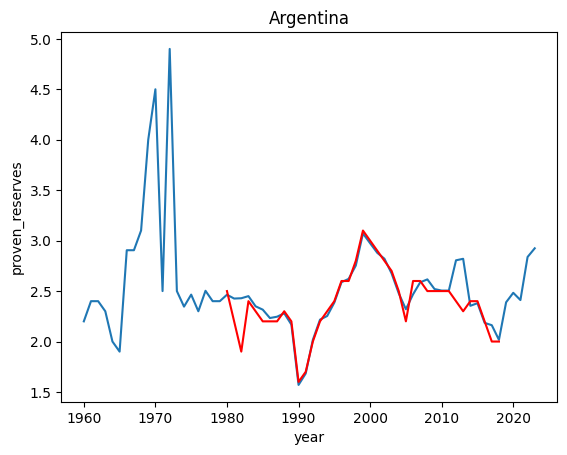

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


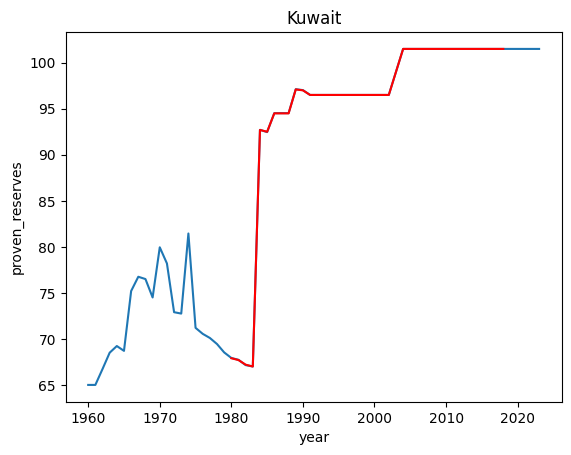

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


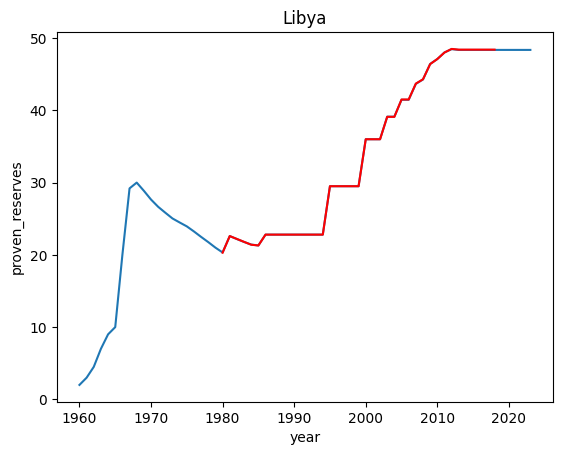

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


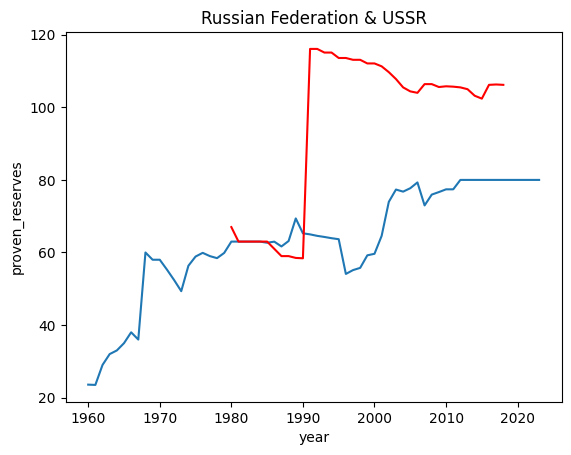

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


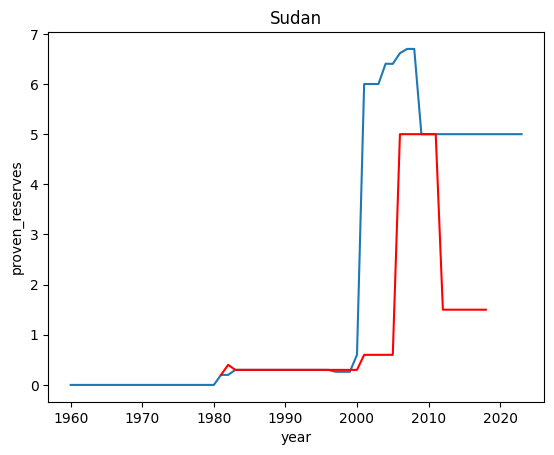

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


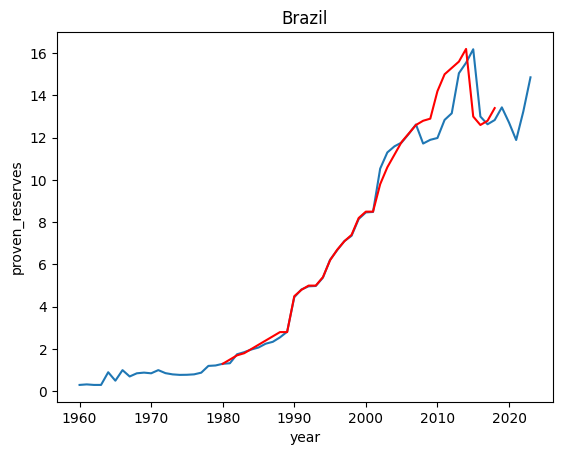

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


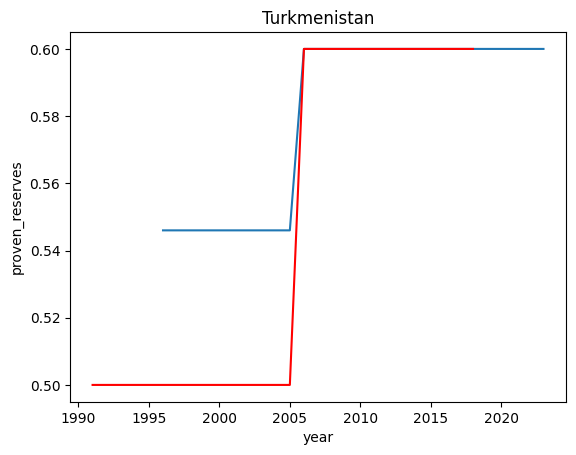

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


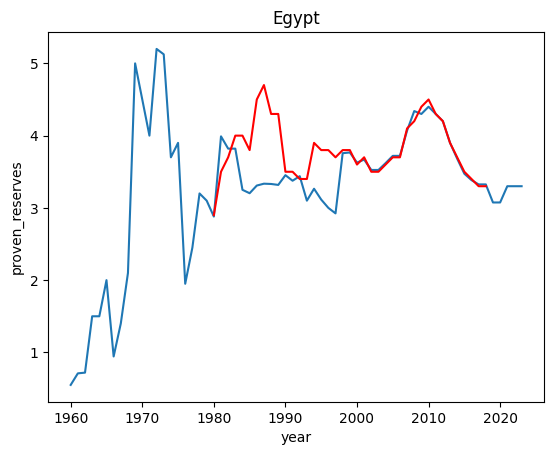

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


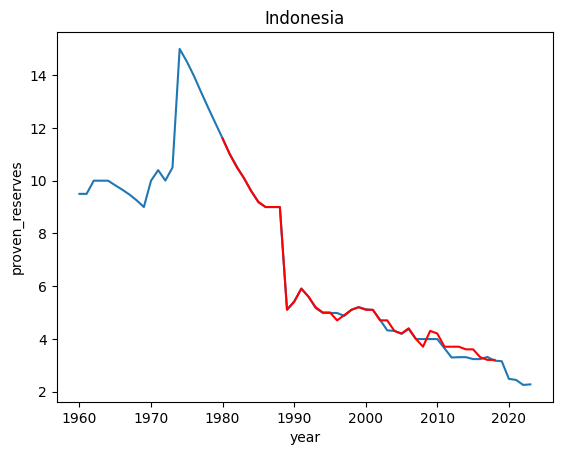

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


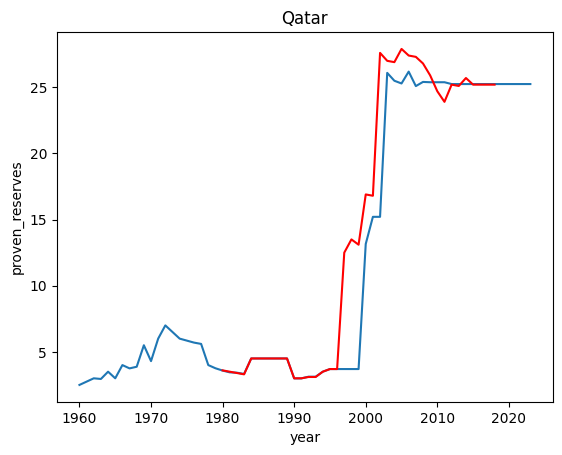

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


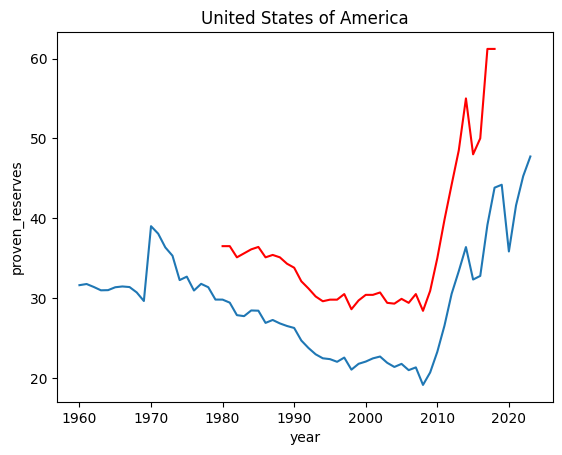

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


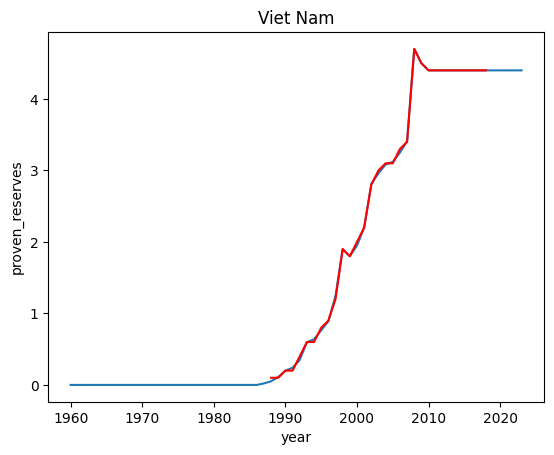

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


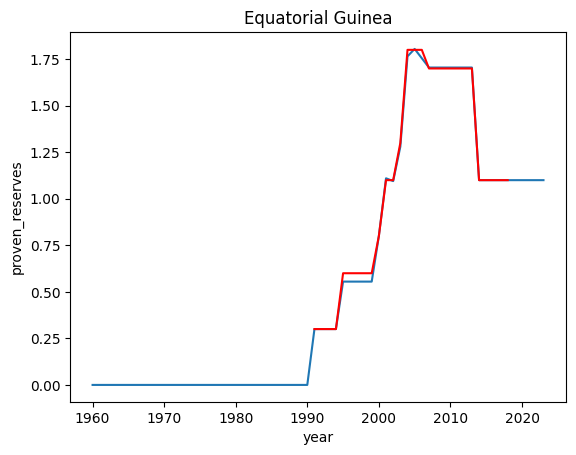

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


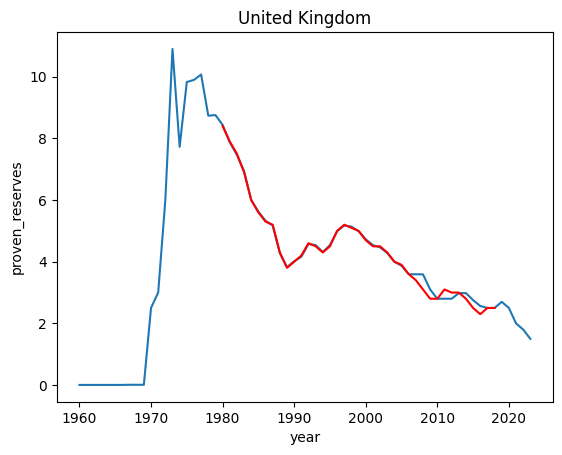

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


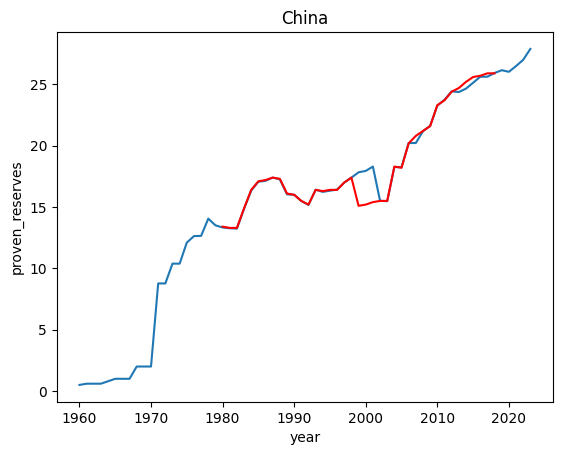

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


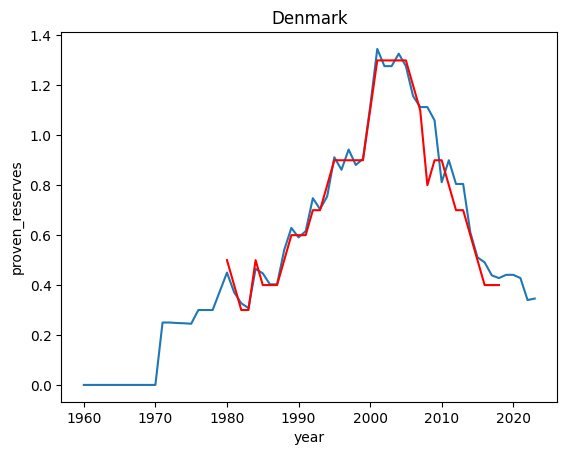

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


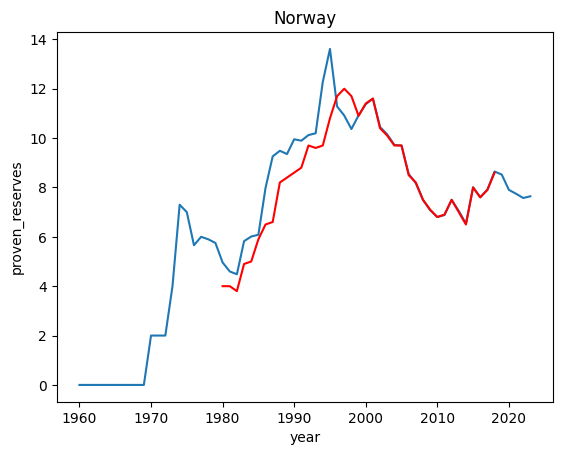

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


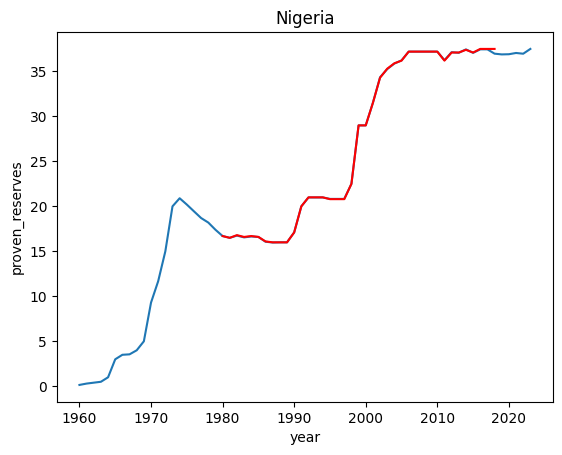

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


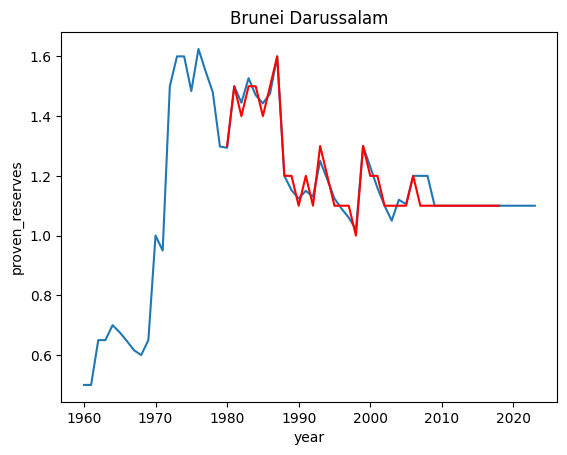

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


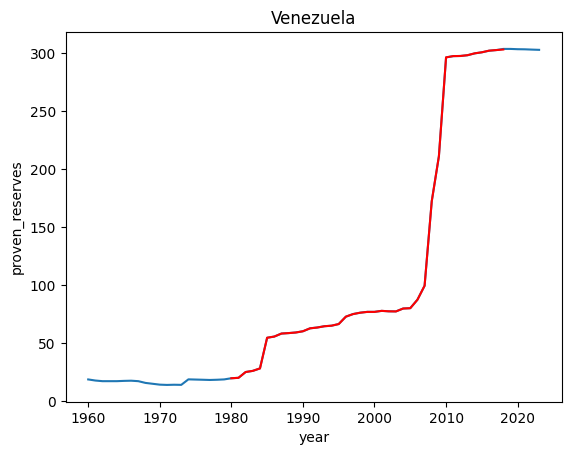

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


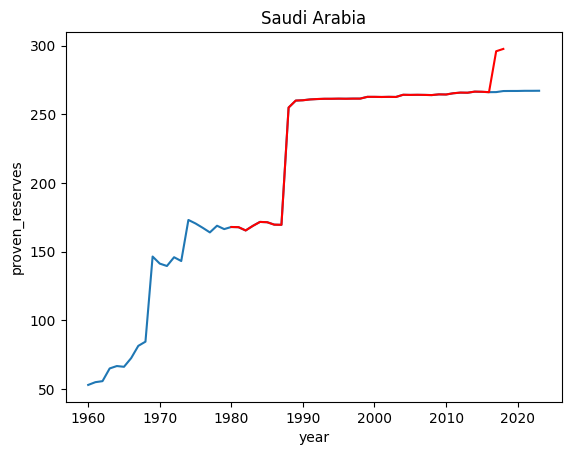

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


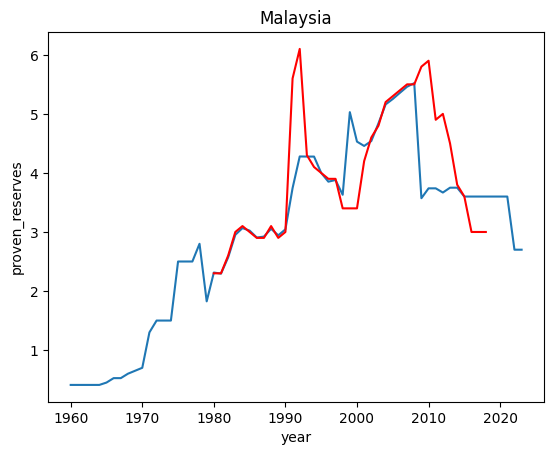

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


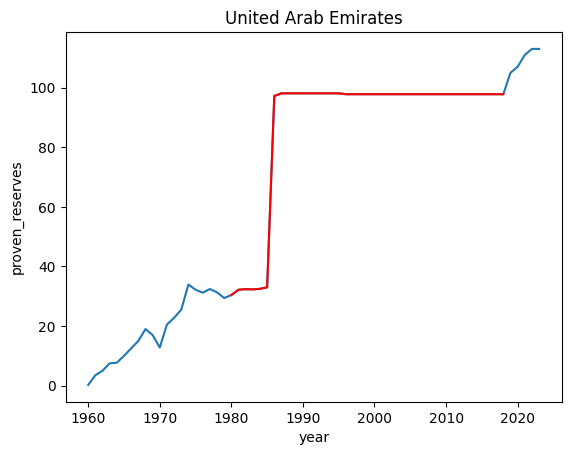

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


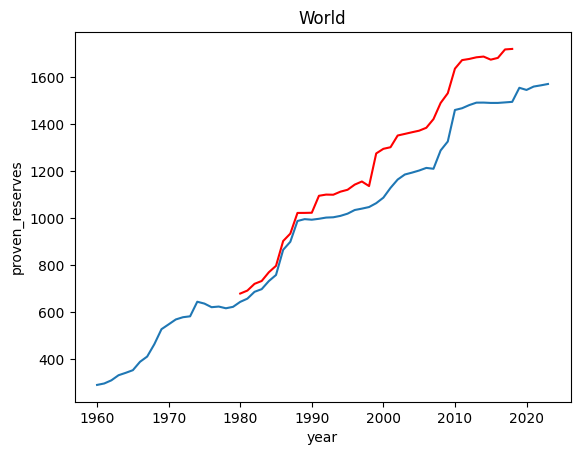

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


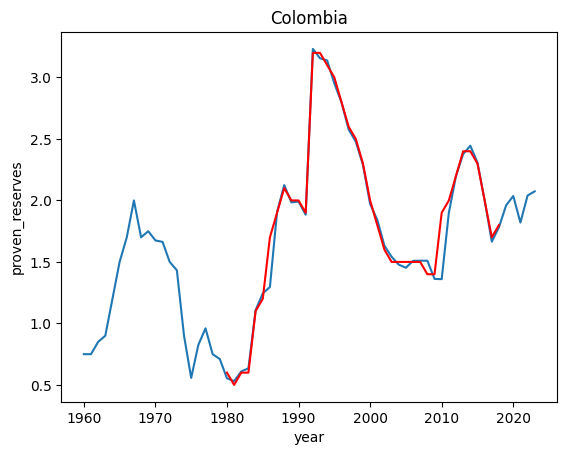

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


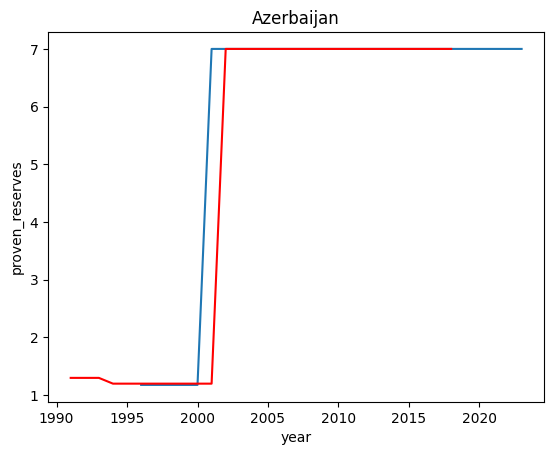

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


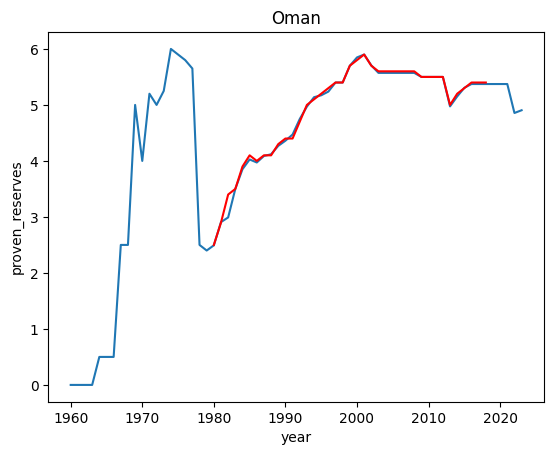

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


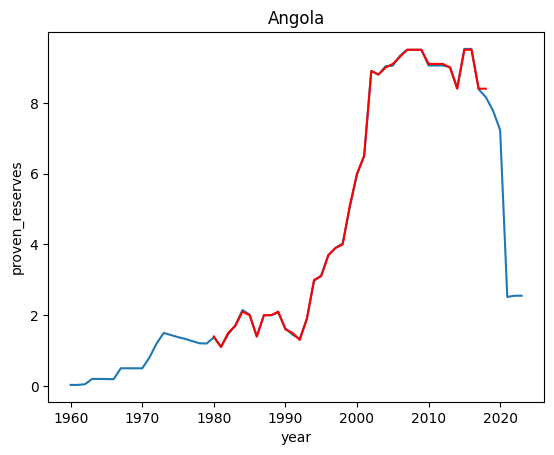

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


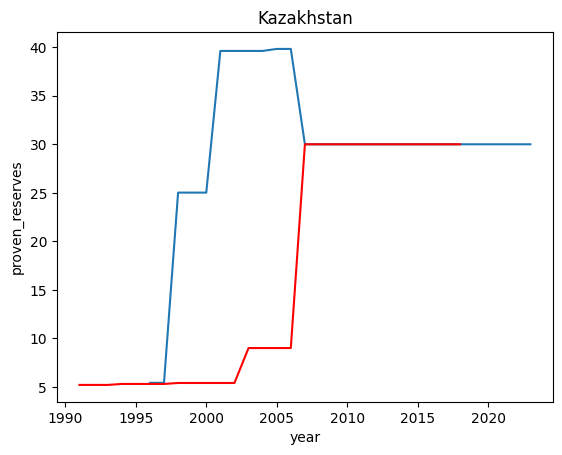

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


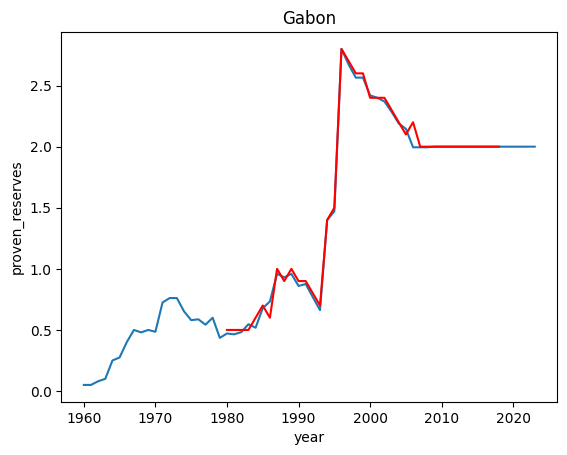

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


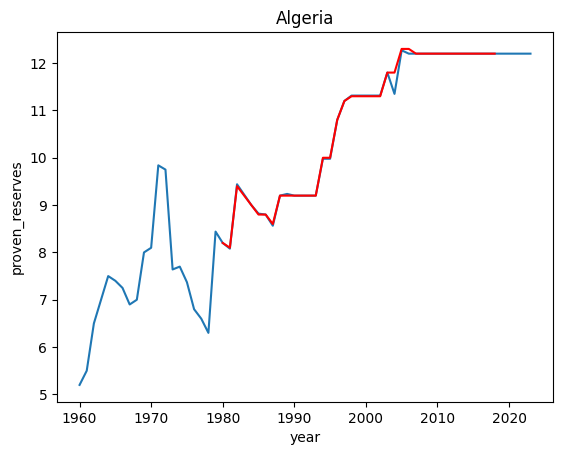

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


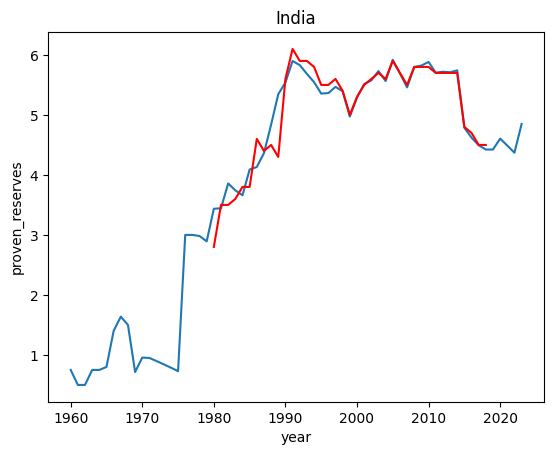

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


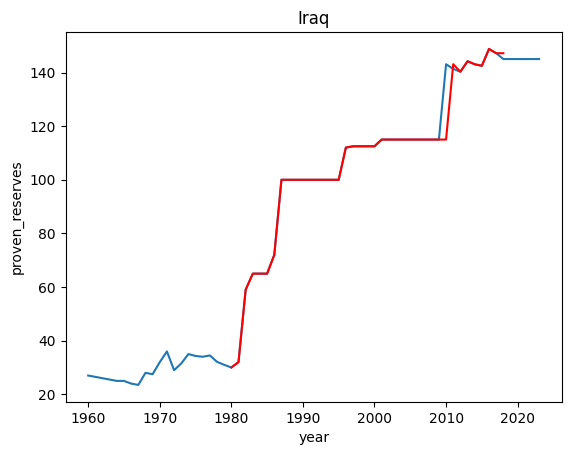

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


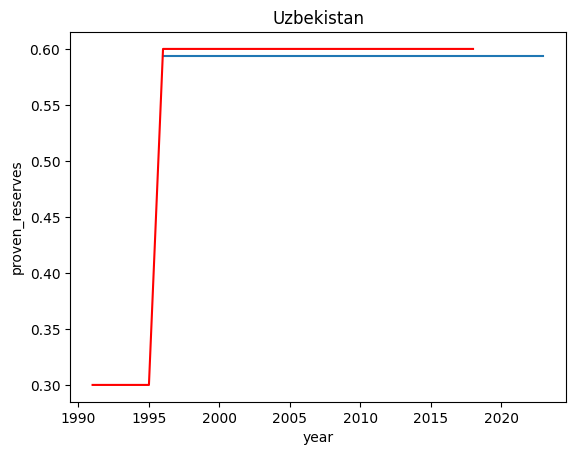

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


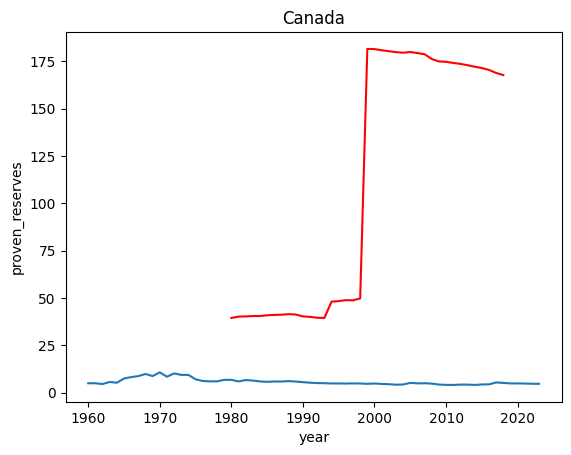

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


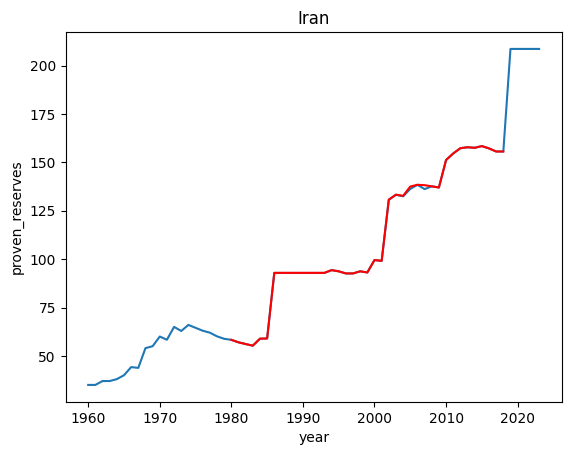

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


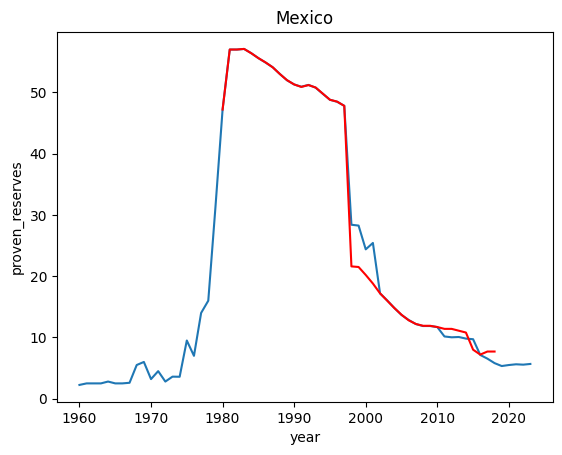

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


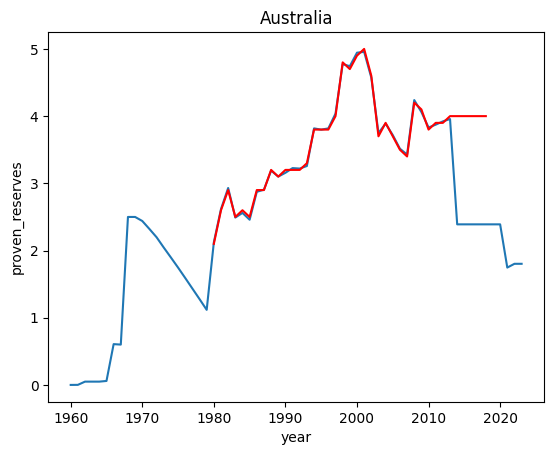

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


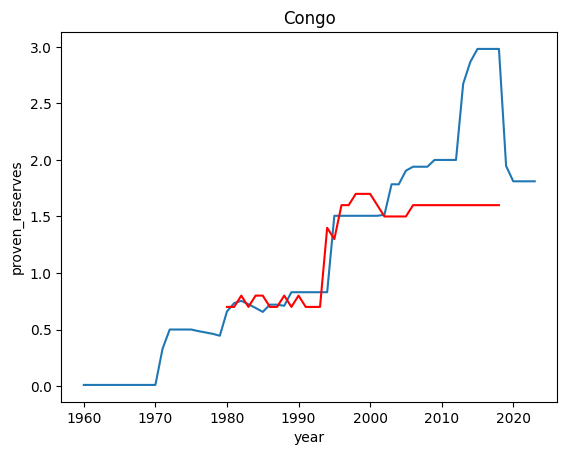

C:\Users\lohof\AppData\Local\Temp\ipykernel_3512\4135546379.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa_pays.sort_values(by="year", ascending=True, inplace=True)


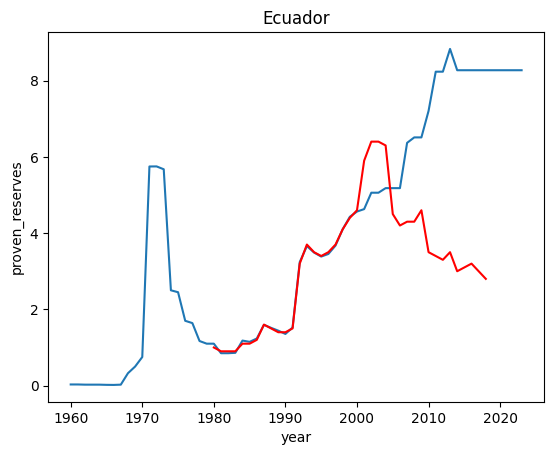

In [6]:
# Comparaison des tendances entre les deux bases

# Création liste pays commune aux deux bases de données
list_dfa_pays = dfa.group_name.unique()
list_dfb_pays = dfb.group_name.unique()
set_dfa_pays = set(list_dfa_pays)
set_dfb_pays = set(list_dfb_pays)

set_pays_communs = set_dfa_pays.intersection(set_dfb_pays)
list_pays_communs = list(set_pays_communs)

# Boucle graphiques comparatifs des tendances entre les deux bases par pays
for pays in list_pays_communs :
    dfa_pays = dfa[dfa["group_name"] == pays]
    dfa_pays.sort_values(by="year", ascending=True, inplace=True)
    
    dfb_pays = dfb[dfb["group_name"] == pays]
    dfb_pays = dfb_pays.T
    dfb_pays.columns = dfb_pays.iloc[0]
    dfb_pays = dfb_pays[1:]
    
    sns.lineplot(dfb_pays, 
             legend = False)

    sns.lineplot(data = dfa_pays,
                x = "year",
                y = "proven_reserves",
                color = "red",
                legend = False)
    plt.title(dfb_pays.columns[0])
    plt.show()